In [74]:
import numpy as np
import pandas as pd

In [75]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [76]:
# Fonction de récupération des données
def load_cifar10(path):
    data_images= []
    labels= []
    
    for i in range(1, 6):
        batch = unpickle(path + f'data_batch_{i}')
        data_images.append(batch[b'data'])
        labels.extend(batch[b'labels'])
        
    test_batch = unpickle(path + 'test_batch')
    test_images = test_batch[b'data']
    test_labels = test_batch[b'labels']
        
    return data_images, np.array(labels), test_images, np.array(test_labels)

In [77]:
cif_path='C:/Users/sadio/Desktop/my_notebooks/Deep_learning_project/data/cifar-10-batches-py/'

In [78]:
data_images, labels, test_images, test_labels = load_cifar10(cif_path)

In [93]:
data_images = np.vstack(data_images)

In [ ]:
# Indices des classes correspondant aux animaux
animal_classes = [2, 3, 4, 5,6,7]  

In [112]:
# Filtrer les données d'entrainements 
train_animal_images = [image for image, label in zip(data_images, labels) if label in animal_classes]
train_animal_labels = [label for label in labels if label in animal_classes]

In [128]:
# Conversion en tableaux Numpy
train_animal_images = np.array(train_animal_images)
train_animal_labels = np.array(train_animal_labels)

In [129]:
# Filtrer les données de test

test_animal_images = [image for image, label in zip(test_images, test_labels) if label in animal_classes]
test_animal_labels = [label for label in test_labels if label in animal_classes]

In [130]:
# Conversion en tableaux Numpy
test_animal_images = np.array(test_animal_images)
test_animal_labels = np.array(test_animal_labels)


In [131]:
print("Shape des données d'entrainement")

print(train_animal_images.shape)
print(train_animal_labels.shape)

print("Shape des données de test")
print(test_animal_images.shape)
print(test_animal_labels.shape)



Shape des données d'entrainement
(30000, 32, 32, 3)
(1, 30000)
Shape des données de test
(6000, 3072)
(6000,)


In [125]:
# Reshape des dimensions 

train_animal_images = train_animal_images.reshape(len(train_animal_images),3,32,32).transpose(0,2,3,1)
test_animal_images = test_animal_images.reshape(len(test_animal_images),3,32,32).transpose(0,2,3,1)
print(train_animal_images.shape)
print(test_animal_images.shape)

(30000, 32, 32, 3)
(6000, 32, 32, 3)


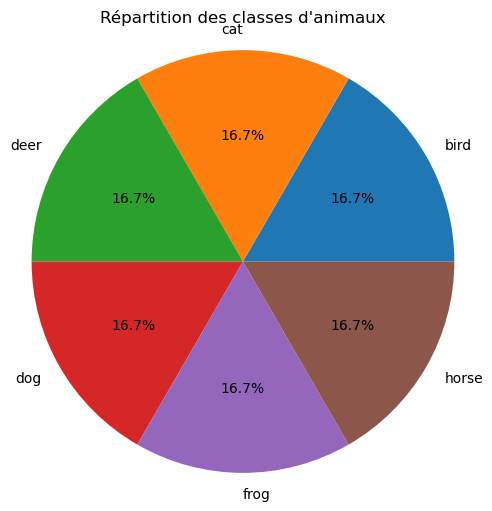

In [159]:
animal_classes = [2, 3, 4, 5, 6,7]  # Indices des classes correspondant aux animaux
animal_names = ["bird", "cat","deer","dog","frog", "horse"]

animal_counts = [np.sum(train_animal_labels == animal_class) for animal_class in animal_classes]


plt.figure(figsize=(6, 6))
plt.pie(animal_counts, labels=animal_names, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Répartition des classes d\'animaux')
plt.show()
